In [59]:
import json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [60]:
# Load user interests from JSON (replace 'your_interests.json' with your JSON file)
with open('../data/users.json', 'r', encoding='utf-8') as json_file:
    user_data = json.load(json_file)

# Load item data from JSON (replace 'your_items.json' with your JSON file)
with open('../data/campaigns.json', 'r', encoding='utf-8') as json_file:
    items_data = json.load(json_file)

with open('../data/interactions.json', 'r', encoding='utf-8') as json_file:
    interaction_data = json.load(json_file)

user_df = pd.DataFrame(user_data)
items_df = pd.DataFrame(items_data)
interactions_df = pd.DataFrame(interaction_data)


In [61]:
items = items_df.merge(interactions_df, left_on='_id', right_on='campaignId', how='left')
items = items[['_id', 'genres', 'user', 'status', 'tags']]

# items['genres'] = items['genres'].apply(lambda x: ','.join(x))
# Convert elements to strings
items['genres'] = items['genres'].astype(str)

# Remove square brackets and spaces, and split the string into a list
items['genres'] = items['genres'].str.strip('[]').str.replace(' ', '').str.replace("'", '').str.split(',')

# If you want to strip leading/trailing whitespaces from each genre in the list
items['genres'] = items['genres'].apply(lambda x: [genre.strip() for genre in x])



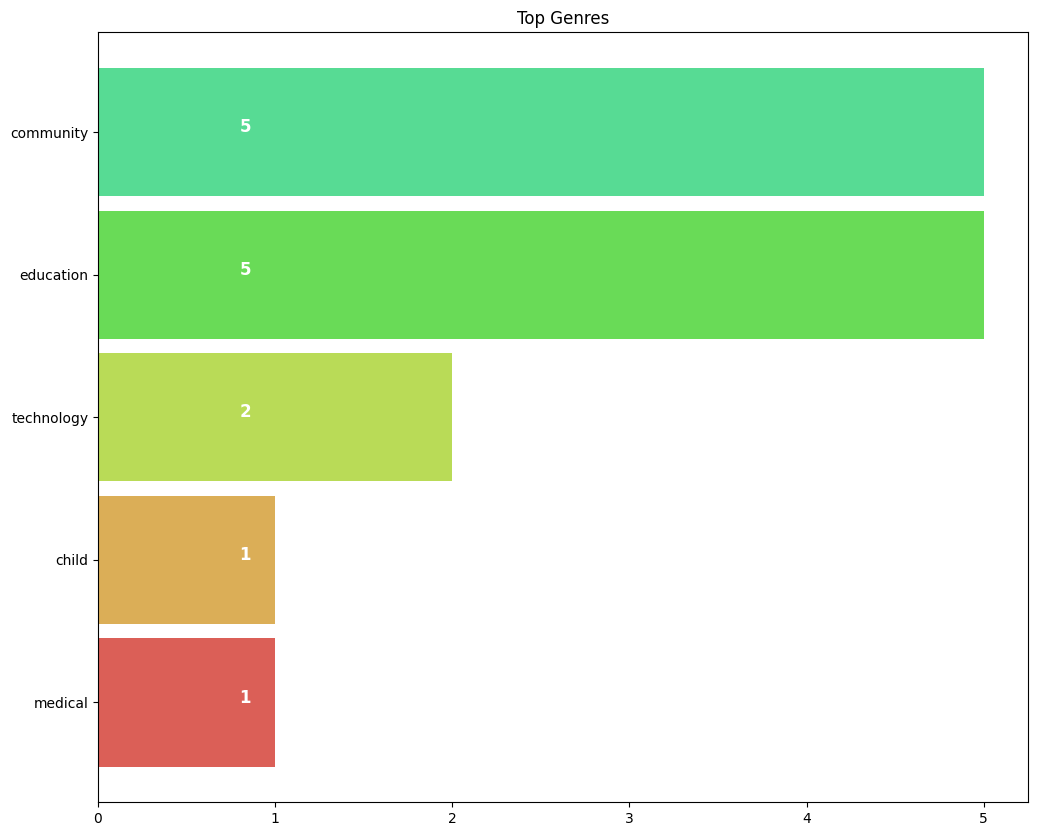

In [62]:
plt.subplots(figsize=(12,10))
list1 = []
for i in items['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [63]:
# genresList with unique genres
genreList = []
for index, row in items.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['education', 'community', 'medical', 'child', 'technology']

In [64]:
# One hot Encoding for multiple labels
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [65]:
items['genres_bin'] = items['genres'].apply(lambda x: binary(x))
items['genres_bin'].head()

0    [1, 0, 0, 0, 0]
1    [0, 1, 0, 0, 0]
2    [0, 1, 0, 0, 0]
3    [1, 1, 0, 0, 0]
4    [1, 1, 0, 0, 0]
Name: genres_bin, dtype: object

In [71]:
def Similarity(item1, item2):
    a = items.iloc[item1]
    b = items.iloc[item2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)

    return genreDistance

In [73]:
Similarity(1, 4)

print(items.iloc[1])
print(items.iloc[4])


_id           6598e133c4ba9e96ba6fc5d6
genres                     [community]
user          64e807313dae5c7f6bf58b76
status                             1.0
tags                           [treem]
genres_bin             [0, 1, 0, 0, 0]
words_bin              [0, 0, 0, 0, 0]
Name: 1, dtype: object
_id           6599425fe3e75cddc1a4884b
genres          [community, education]
user          64e807313dae5c7f6bf58b76
status                             1.0
tags                [startup, giadinh]
genres_bin             [1, 1, 0, 0, 0]
words_bin              [0, 0, 0, 0, 0]
Name: 4, dtype: object


In [68]:
# target_user_id = '650a5c3a0057dfad70f707a9'
# recommendations = get_hybrid_recommendations(target_user_id)
# # Print recommended items
# for item in recommendations:
#     print(f"Item ID: {item['_id']}, Genres: {item['genres']}")